# Phase 1: The Signal Collector (Days 1-7)

o Focus: Data Engineering & Synthetic Data.
 
- Task 1: Define the "Credit Signals".
    - Instead of random user data, the interns must design a DB schema that captures predictive metadata.
    - Direct instruction to Backend Team: "We need you to log device_id, ip_address, login_timestamp, and avg_response_time in chat."
- Task 2: Synthetic "Bad Actor" Generation.
    - Use Faker to generate two datasets:
        - Group A (Good Borrowers): Consistent logins, verified email, complete profile, connects with other "Good" users.
        - Group B (Defaults): Random logins, changing IP addresses, incomplete profile, spammy chat behavior.
- Goal: Create a labeled dataset (target_variable: 0 or 1) for training.

- Generate Data

In [1]:
# import pandas as pd
# import numpy as np
# from faker import Faker
# import random
# from datetime import datetime
# import os

# # Set random seeds
# random.seed(42)
# np.random.seed(42)
# fake = Faker()
# Faker.seed(42)

# # Configuration
# NUM_USERS = 100000
# GOOD_USERS = 50000
# BAD_USERS = NUM_USERS - GOOD_USERS

# # Create directory
# os.makedirs('data', exist_ok=True)

# rows = []
# now = datetime.now()

# for user_id in range(NUM_USERS):
#     is_good = user_id < GOOD_USERS
    
#     # Account lifecycle
#     if is_good:
#         account_created_at = fake.date_time_between(start_date="-3y", end_date="-60d")
#     else:
#         account_created_at = fake.date_time_between(start_date="-60d", end_date="now")
    
#     account_age_days = (now - account_created_at).days
    
#     # Device & IP
#     if is_good:
#         device_id = f"device_{user_id % 100}"
#         ip_address = fake.ipv4() if random.random() < 0.9 else fake.ipv4()
#     else:
#         device_id = fake.uuid4()
#         ip_address = fake.ipv4()
    
#     # Response time
#     if is_good:
#         avg_response_time = random.uniform(2, 6)
#     else:
#         avg_response_time = random.uniform(15, 60)
    
#     # Profile
#     if is_good:
#         complete_profile = round(random.uniform(0.75, 1.0), 2)
#     else:
#         complete_profile = round(random.uniform(0.1, 0.65), 2)
    
#     incomplete_profile = round(1 - complete_profile, 2)
    
#     # Login patterns
#     if is_good:
#         consistent_logins = random.randint(20, 100)
#         random_logins = random.randint(0, 5)
#         changing_ip_addresses = random.randint(0, 5)
#     else:
#         consistent_logins = random.randint(0, 5)
#         random_logins = random.randint(20, 200)
#         changing_ip_addresses = random.randint(10, 150)
    
#     # Email verification
#     if is_good:
#         verified_email = 1
#     else:
#         verified_email = random.choice([0, 1])
    
#     # Chat behavior
#     if is_good:
#         messages_per_day = random.randint(10, 40)
#         toxic_message_count_prior = random.randint(0, 3)
#         spammy_chat_behavior = 1 if random.random() < 0.1 else 0
#     else:
#         messages_per_day = random.randint(50, 200)
#         toxic_message_count_prior = random.randint(5, 30)
#         spammy_chat_behavior = 1 if random.random() < 0.7 else 0
    
#     # Social connections
#     if is_good:
#         connects_with_other_users = random.randint(30, 200)
#     else:
#         connects_with_other_users = random.randint(0, 30)
    
#     # Login timestamp
#     login_timestamp = fake.date_time_between(start_date="-30d", end_date="now")
    
#     # CORRECTED dictionary with proper column names
#     rows.append({
#         "user_id": f"user_{user_id}",
#         "device_id": device_id,
#         "ip_address": ip_address,
#         "account_created_at": account_created_at,
#         "account_age_days": account_age_days,
#         "login_timestamp": login_timestamp,
#         "avg_response_time": avg_response_time,
#         "consistent_logins": consistent_logins,
#         "random_logins": random_logins,  # Fixed: lowercase
#         "changing_ip_addresses": changing_ip_addresses,  # Fixed: lowercase
#         "verified_email": verified_email,
#         "complete_profile": complete_profile,
#         "incomplete_profile": incomplete_profile,
#         "messages_per_day": messages_per_day,
#         "toxic_message_count_prior": toxic_message_count_prior,
#         "spammy_chat_behavior": spammy_chat_behavior,
#         "connects_with_other_users": connects_with_other_users,
#         "target": 1 if is_good else 0  # Fixed: is_good
#     })

# # Create DataFrame
# df = pd.DataFrame(rows)

# # Add noise
# NOISE_RATIO = 0.2
# noisy_indices = np.random.choice(df.index, int(len(df) * NOISE_RATIO), replace=False)

# for idx in noisy_indices:
#     df.loc[idx, "avg_response_time"] *= random.uniform(0.7, 1.4)
#     df.loc[idx, "consistent_logins"] = max(0, df.loc[idx, "consistent_logins"] + random.randint(-10, 10))
#     df.loc[idx, "random_logins"] = max(0, df.loc[idx, "random_logins"] + random.randint(-5, 20))
#     df.loc[idx, "changing_ip_addresses"] = max(0, df.loc[idx, "changing_ip_addresses"] + random.randint(-5, 30))
    
#     df.loc[idx, "complete_profile"] = np.clip(
#         df.loc[idx, "complete_profile"] + random.uniform(-0.2, 0.2), 0, 1
#     )
#     df.loc[idx, "incomplete_profile"] = round(1 - df.loc[idx, "complete_profile"], 2)

# # Label noise
# LABEL_NOISE_RATIO = 0.08
# label_noise_idx = np.random.choice(df.index, int(len(df) * LABEL_NOISE_RATIO), replace=False)
# df.loc[label_noise_idx, "target"] = 1 - df.loc[label_noise_idx, "target"]

# # Ensure numeric columns are non-negative
# numeric_cols = [
#     "avg_response_time", "consistent_logins", "random_logins",
#     "changing_ip_addresses", "connects_with_other_users", "account_age_days",
#     "messages_per_day", "toxic_message_count_prior"
# ]

# for col in numeric_cols:
#     df[col] = df[col].clip(lower=0)

# # Save
# output_path = "data/detrust_dataset.xlsx"
# df.to_excel(output_path, index=False)

# print(f"Dataset created with {len(df)} users")
# print(f"Columns: {df.columns.tolist()}")
# print(f"Saved to: {output_path}")

In [2]:
import pandas as pd 
df = pd.read_excel("data/detrust_dataset.xlsx")

print(f"Total users: {len(df)}")
print(f"Good borrowers (target=1): {(df['target'] == 1).sum()} ({(df['target'] == 1).mean()*100:.1f}%)")
print(f"Default risks (target=0): {(df['target'] == 0).sum()} ({(df['target'] == 0).mean()*100:.1f}%)")

print("\nBasic Statistics:")
print(f"• Avg response time: {df['avg_response_time'].mean():.2f}s")
print(f"• Avg profile completion: {df['complete_profile'].mean()*100:.1f}%")
print(f"• Email verified: {df['verified_email'].mean()*100:.1f}%")
print(f"• Avg social connections: {df['connects_with_other_users'].mean():.1f}")

print("\nCredit Signals Summary:")
print("Good Borrowers typically have:")
print("  ✓ Consistent login patterns")
print("  ✓ Verified email")
print("  ✓ Complete profiles")
print("  ✓ Fast response times")
print("  ✓ Many social connections")

print("\nDefault Risks typically have:")
print("  ✗ Random login patterns")
print("  ✗ Frequently changing IPs")
print("  ✗ Incomplete profiles")
print("  ✗ Slow response times")
print("  ✗ Few social connections")
print("  ✗ Spammy chat behavior")

Total users: 100000
Good borrowers (target=1): 49970 (50.0%)
Default risks (target=0): 50030 (50.0%)

Basic Statistics:
• Avg response time: 20.93s
• Avg profile completion: 62.4%
• Email verified: 74.9%
• Avg social connections: 65.1

Credit Signals Summary:
Good Borrowers typically have:
  ✓ Consistent login patterns
  ✓ Verified email
  ✓ Complete profiles
  ✓ Fast response times
  ✓ Many social connections

Default Risks typically have:
  ✗ Random login patterns
  ✗ Frequently changing IPs
  ✗ Incomplete profiles
  ✗ Slow response times
  ✗ Few social connections
  ✗ Spammy chat behavior


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load dataset
df = pd.read_excel("data/detrust_dataset.xlsx")

print("\nDataset Preview:")
display(df.head())

print("\nColumn Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2}. {col}")


Dataset Preview:


,user_id,device_id,ip_address,account_created_at,account_age_days,login_timestamp,avg_response_time,consistent_logins,random_logins,changing_ip_addresses,verified_email,complete_profile,incomplete_profile,messages_per_day,toxic_message_count_prior,spammy_chat_behavior,connects_with_other_users,target
0,user_0,device_0,81.154.20.149,2025-10-19 01:58:36,102,2026-01-11 09:01:02,2.100043,48,1,5,1,0.82,0.18,13,0,0,38,1
1,user_1,device_1,70.143.71.233,2024-01-11 12:19:02,748,2026-01-25 23:05:45,2.874552,23,4,1,1,0.88,0.12,32,3,0,180,1
2,user_2,device_2,130.8.186.60,2023-06-13 19:43:56,960,2025-12-31 22:24:50,5.477201,40,5,3,1,0.94,0.06,20,2,0,116,1
3,user_3,device_3,112.108.176.251,2023-06-24 07:37:46,950,2026-01-26 17:35:44,3.519709,64,4,2,1,0.84,0.16,35,0,0,167,1
4,user_4,device_4,189.108.180.212,2023-12-04 15:37:21,786,2026-01-10 04:31:46,5.689181,57,5,4,1,0.77,0.23,38,2,0,47,0



Column Names:
 1. user_id
 2. device_id
 3. ip_address
 4. account_created_at
 5. account_age_days
 6. login_timestamp
 7. avg_response_time
 8. consistent_logins
 9. random_logins
10. changing_ip_addresses
11. verified_email
12. complete_profile
13. incomplete_profile
14. messages_per_day
15. toxic_message_count_prior
16. spammy_chat_behavior
17. connects_with_other_users
18. target


- Data Types and Missing Values

In [4]:
# Check data types
print("\n📊 Data Types:")
print(df.dtypes)

# Check missing values
print("\n🔍 Missing Values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_%': missing_pct.round(2)
})
display(missing_df[missing_df['Missing_Count'] > 0])

if missing.sum() == 0:
    print("No missing values found!")
else:
    print(f"Total missing values: {missing.sum()}")

# Memory usage
print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


📊 Data Types:
user_id                              object
device_id                            object
ip_address                           object
account_created_at           datetime64[ns]
account_age_days                      int64
login_timestamp              datetime64[ns]
avg_response_time                   float64
consistent_logins                     int64
random_logins                         int64
changing_ip_addresses                 int64
verified_email                        int64
complete_profile                    float64
incomplete_profile                  float64
messages_per_day                      int64
toxic_message_count_prior             int64
spammy_chat_behavior                  int64
connects_with_other_users             int64
target                                int64
dtype: object

🔍 Missing Values:


,Missing_Count,Missing_%


No missing values found!

Memory Usage: 29.81 MB


- Target Variable Analysis

In [5]:
# Count distribution
target_counts = df['target'].value_counts()
target_percent = df['target'].value_counts(normalize=True) * 100

print("\nTarget Distribution:")
for target_val in [0, 1]:
    count = target_counts[target_val]
    pct = target_percent[target_val]
    label = "Default Risk" if target_val == 0 else "Good Borrower"
    print(f"{label}: {count:,} users ({pct:.1f}%)")


Target Distribution:
Default Risk: 50,030 users (50.0%)
Good Borrower: 49,970 users (50.0%)


In [6]:
import numpy as np

targets = np.random.binomial(1, 0.5, 100000)
np.unique(targets, return_counts=True)

(array([0, 1], dtype=int32), array([50076, 49924]))

- Numerical Features Statistics

In [7]:
# Identify numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('target')  # Remove target

print(f"\nFound {len(numerical_features)} numerical features:")

# Display in groups
for i in range(0, len(numerical_features), 4):
    print(", ".join(numerical_features[i:i+4]))

# Summary statistics
print("\nSummary Statistics:")
stats_df = df[numerical_features].describe().T
stats_df = stats_df.round(2)
display(stats_df)


Found 12 numerical features:
account_age_days, avg_response_time, consistent_logins, random_logins
changing_ip_addresses, verified_email, complete_profile, incomplete_profile
messages_per_day, toxic_message_count_prior, spammy_chat_behavior, connects_with_other_users

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
account_age_days,100000.0,303.59,346.09,0.00,29.00,59.50,579.00,1095.00
avg_response_time,100000.0,20.93,19.47,1.41,4.00,9.46,37.49,83.44
consistent_logins,100000.0,31.47,33.18,0.00,3.00,14.00,60.00,110.00
random_logins,100000.0,57.93,65.48,0.00,3.00,22.00,112.00,220.00
changing_ip_addresses,100000.0,43.82,48.82,0.00,3.00,20.00,83.00,180.00
verified_email,100000.0,0.75,0.43,0.00,0.00,1.00,1.00,1.00
complete_profile,100000.0,0.62,0.28,0.00,0.38,0.67,0.87,1.00
incomplete_profile,100000.0,0.38,0.28,0.00,0.13,0.33,0.62,1.00
messages_per_day,100000.0,75.03,59.13,10.00,25.00,45.00,125.00,200.00
toxic_message_count_prior,100000.0,9.49,9.62,0.00,1.00,4.00,18.00,30.00


- Feature 1 - account_age_days

In [8]:
feature_1 = 'account_age_days'

print(f"\nAnalyzing: {feature_1}")

# Basic stats
print(f"Statistics:")
print(f"  • Mean: {df[feature_1].mean():.1f} days")
print(f"  • Median: {df[feature_1].median():.1f} days")
print(f"  • Std: {df[feature_1].std():.1f} days")
print(f"  • Range: {df[feature_1].min():.0f} - {df[feature_1].max():.0f} days")

# By target class
print(f"\nBy Target Class:")
good_mean = df[df['target'] == 1][feature_1].mean()
bad_mean = df[df['target'] == 0][feature_1].mean()
print(f"  • Good borrowers: {good_mean:.1f} days")
print(f"  • Default risks: {bad_mean:.1f} days")


Analyzing: account_age_days
Statistics:
  • Mean: 303.6 days
  • Median: 59.5 days
  • Std: 346.1 days
  • Range: 0 - 1095 days

By Target Class:
  • Good borrowers: 533.2 days
  • Default risks: 74.2 days


- Feature 2 - avg_response_time

In [9]:
feature_2 = 'avg_response_time'

print(f"\nAnalyzing: {feature_2}")

# Basic stats
print(f"Statistics:")
print(f"  • Mean: {df[feature_2].mean():.2f} seconds")
print(f"  • Median: {df[feature_2].median():.2f} seconds")
print(f"  • Std: {df[feature_2].std():.2f} seconds")

# By target class
print(f"\nBy Target Class:")
good_stats = df[df['target'] == 1][feature_2].describe()
bad_stats = df[df['target'] == 0][feature_2].describe()
print(f"  • Good borrowers: {good_stats['mean']:.2f}s ({good_stats['min']:.1f}-{good_stats['max']:.1f}s)")
print(f"  • Default risks: {bad_stats['mean']:.2f}s ({bad_stats['min']:.1f}-{bad_stats['max']:.1f}s)")
print(f"  • Default risks are {(bad_stats['mean']/good_stats['mean']):.1f}x slower!")


Analyzing: avg_response_time
Statistics:
  • Mean: 20.93 seconds
  • Median: 9.46 seconds
  • Std: 19.47 seconds

By Target Class:
  • Good borrowers: 6.72s (1.4-79.7s)
  • Default risks: 35.12s (1.5-83.4s)
  • Default risks are 5.2x slower!


- Feature 3 - consistent_logins

In [10]:
feature_3 = 'consistent_logins'

print(f"\nAnalyzing: {feature_3}")

# Basic stats
print(f"Statistics:")
print(f"  • Mean: {df[feature_3].mean():.1f}")
print(f"  • Median: {df[feature_3].median():.1f}")
print(f"  • Std: {df[feature_3].std():.1f}")

# By target class
print(f"\nBy Target Class:")
good_mean = df[df['target'] == 1][feature_3].mean()
bad_mean = df[df['target'] == 0][feature_3].mean()
print(f"  • Good borrowers: {good_mean:.1f} consistent logins")
print(f"  • Default risks: {bad_mean:.1f} consistent logins")
print(f"  • Good borrowers have {good_mean/bad_mean:.1f}x more consistent logins!")


Analyzing: consistent_logins
Statistics:
  • Mean: 31.5
  • Median: 14.0
  • Std: 33.2

By Target Class:
  • Good borrowers: 55.6 consistent logins
  • Default risks: 7.4 consistent logins
  • Good borrowers have 7.5x more consistent logins!


- Feature 4 - random_logins

In [11]:
feature_4 = 'random_logins'

print(f"\nAnalyzing: {feature_4}")

# Basic stats
print(f"Statistics:")
print(f"  • Mean: {df[feature_4].mean():.1f}")
print(f"  • Median: {df[feature_4].median():.1f}")
print(f"  • Std: {df[feature_4].std():.1f}")

# By target class
print(f"\nBy Target Class:")
good_mean = df[df['target'] == 1][feature_4].mean()
bad_mean = df[df['target'] == 0][feature_4].mean()
print(f"  • Good borrowers: {good_mean:.1f} random logins")
print(f"  • Default risks: {bad_mean:.1f} random logins")
print(f"  • Default risks have {bad_mean/good_mean:.1f}x more random logins!")


Analyzing: random_logins
Statistics:
  • Mean: 57.9
  • Median: 22.0
  • Std: 65.5

By Target Class:
  • Good borrowers: 12.7 random logins
  • Default risks: 103.1 random logins
  • Default risks have 8.1x more random logins!



🔍 Analyzing: verified_email
------------------------------------------------------------
📊 Overall Distribution:
  • No: 25,092 users (25.1%)
  • Yes: 74,908 users (74.9%)

🎯 By Target Class:

  When verified_email = No:
    • Default risks: 92.2%
    • Good borrowers: 7.8%

  When verified_email = Yes:
    • Default risks: 35.9%
    • Good borrowers: 64.1%


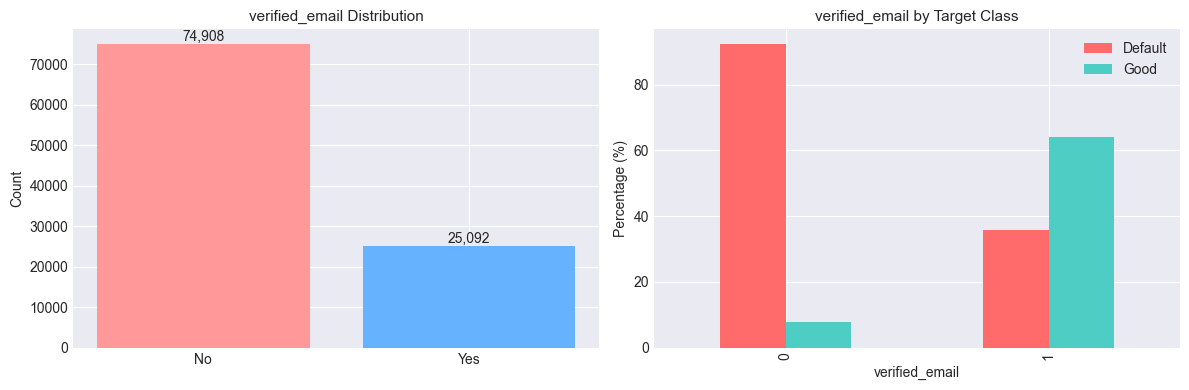


🔍 Analyzing: spammy_chat_behavior
------------------------------------------------------------
📊 Overall Distribution:
  • No: 60,180 users (60.2%)
  • Yes: 39,820 users (39.8%)

🎯 By Target Class:

  When spammy_chat_behavior = No:
    • Default risks: 29.2%
    • Good borrowers: 70.8%

  When spammy_chat_behavior = Yes:
    • Default risks: 81.5%
    • Good borrowers: 18.5%


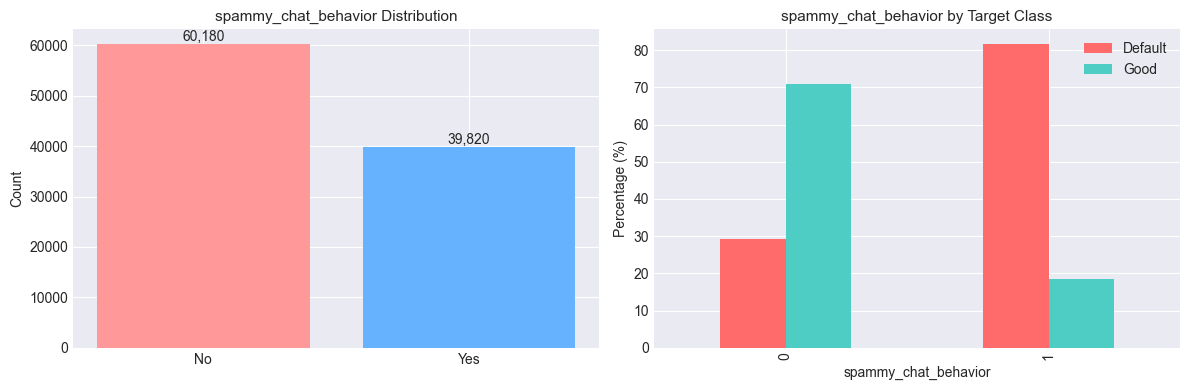

In [12]:
binary_features = ['verified_email', 'spammy_chat_behavior']

for feature in binary_features:
    print(f"\n🔍 Analyzing: {feature}")
    print("-" * 60)
    
    # Overall distribution
    counts = df[feature].value_counts()
    pct = df[feature].value_counts(normalize=True) * 100
    
    print(f"📊 Overall Distribution:")
    for val in [0, 1]:
        label = "No" if val == 0 else "Yes"
        print(f"  • {label}: {counts[val]:,} users ({pct[val]:.1f}%)")
    
    # By target class
    print(f"\n🎯 By Target Class:")
    ct = pd.crosstab(df[feature], df['target'], normalize='index') * 100
    
    for val in [0, 1]:
        label = "No" if val == 0 else "Yes"
        default_pct = ct.loc[val, 0]
        good_pct = ct.loc[val, 1]
        print(f"\n  When {feature} = {label}:")
        print(f"    • Default risks: {default_pct:.1f}%")
        print(f"    • Good borrowers: {good_pct:.1f}%")
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Overall distribution
    axes[0].bar(['No', 'Yes'], counts.values, color=['#FF9999', '#66B2FF'])
    axes[0].set_title(f'{feature} Distribution', fontsize=11)
    axes[0].set_ylabel('Count')
    
    # Add count labels
    for i, count in enumerate(counts.values):
        axes[0].text(i, count + 50, f'{count:,}', ha='center', va='bottom', fontsize=10)
    
    # By target class
    ct.plot(kind='bar', ax=axes[1], color=['#FF6B6B', '#4ECDC4'])
    axes[1].set_title(f'{feature} by Target Class', fontsize=11)
    axes[1].set_xlabel(f'{feature}')
    axes[1].set_ylabel('Percentage (%)')
    axes[1].legend(['Default', 'Good'])
    
    plt.tight_layout()
    plt.show()

- Correlation Analysis


🔥 Top Correlations with Target:
------------------------------------------------------------
  • complete_profile         : +0.742 (Positive correlation)
  • consistent_logins        : +0.726 (Positive correlation)
  • connects_with_other_users: +0.686 (Positive correlation)
  • account_age_days         : +0.663 (Positive correlation)
  • verified_email           : +0.488 (Positive correlation)
  • spammy_chat_behavior     : -0.513 (Negative correlation)
  • changing_ip_addresses    : -0.667 (Negative correlation)
  • random_logins            : -0.690 (Negative correlation)
  • toxic_message_count_prior: -0.698 (Negative correlation)
  • messages_per_day         : -0.712 (Negative correlation)
  • avg_response_time        : -0.729 (Negative correlation)
  • incomplete_profile       : -0.742 (Negative correlation)


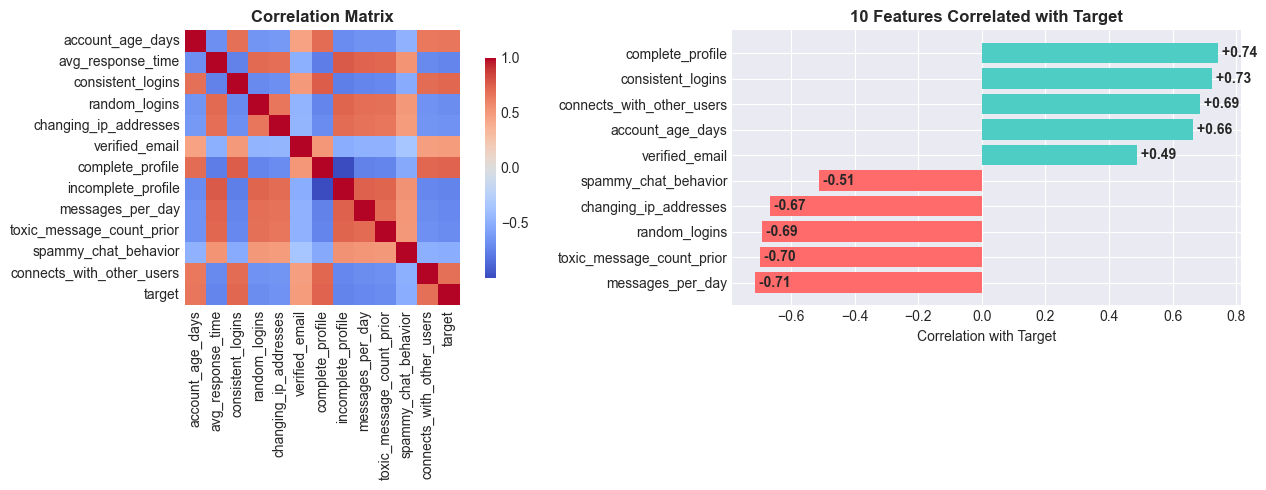

In [13]:
# Calculate correlation matrix
corr_matrix = df.select_dtypes(include=[np.number]).corr()

print("\n🔥 Top Correlations with Target:")
print("-" * 60)
target_corr = corr_matrix['target'].sort_values(ascending=False)
for feature, corr in target_corr.items():
    if feature != 'target':
        direction = "Positive" if corr > 0 else "Negative"
        print(f"  • {feature:25}: {corr:+.3f} ({direction} correlation)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Heatmap
sns.heatmap(corr_matrix, annot=False, fmt='.2f', cmap='coolwarm',
            center=0, ax=axes[0], square=True, cbar_kws={'shrink': 0.8})
axes[0].set_title('Correlation Matrix', fontsize=12, fontweight='bold')

# Top correlations with target
top_n = 10
top_features = target_corr.drop('target').head(top_n).index
top_corr_values = target_corr[top_features]

colors = ['#4ECDC4' if val > 0 else '#FF6B6B' for val in top_corr_values]
axes[1].barh(range(len(top_features)), top_corr_values.values, color=colors)
axes[1].set_yticks(range(len(top_features)))
axes[1].set_yticklabels(top_features)
axes[1].set_xlabel('Correlation with Target')
axes[1].set_title(f'{top_n} Features Correlated with Target', fontsize=12, fontweight='bold')
axes[1].invert_yaxis()

# Add correlation values
for i, (feature, corr) in enumerate(zip(top_features, top_corr_values)):
    axes[1].text(corr, i, f' {corr:+.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

- Multivariate Analysis - Pairplot


🔗 Creating pairplot for top features:
  • account_age_days
  • avg_response_time
  • consistent_logins
  • complete_profile


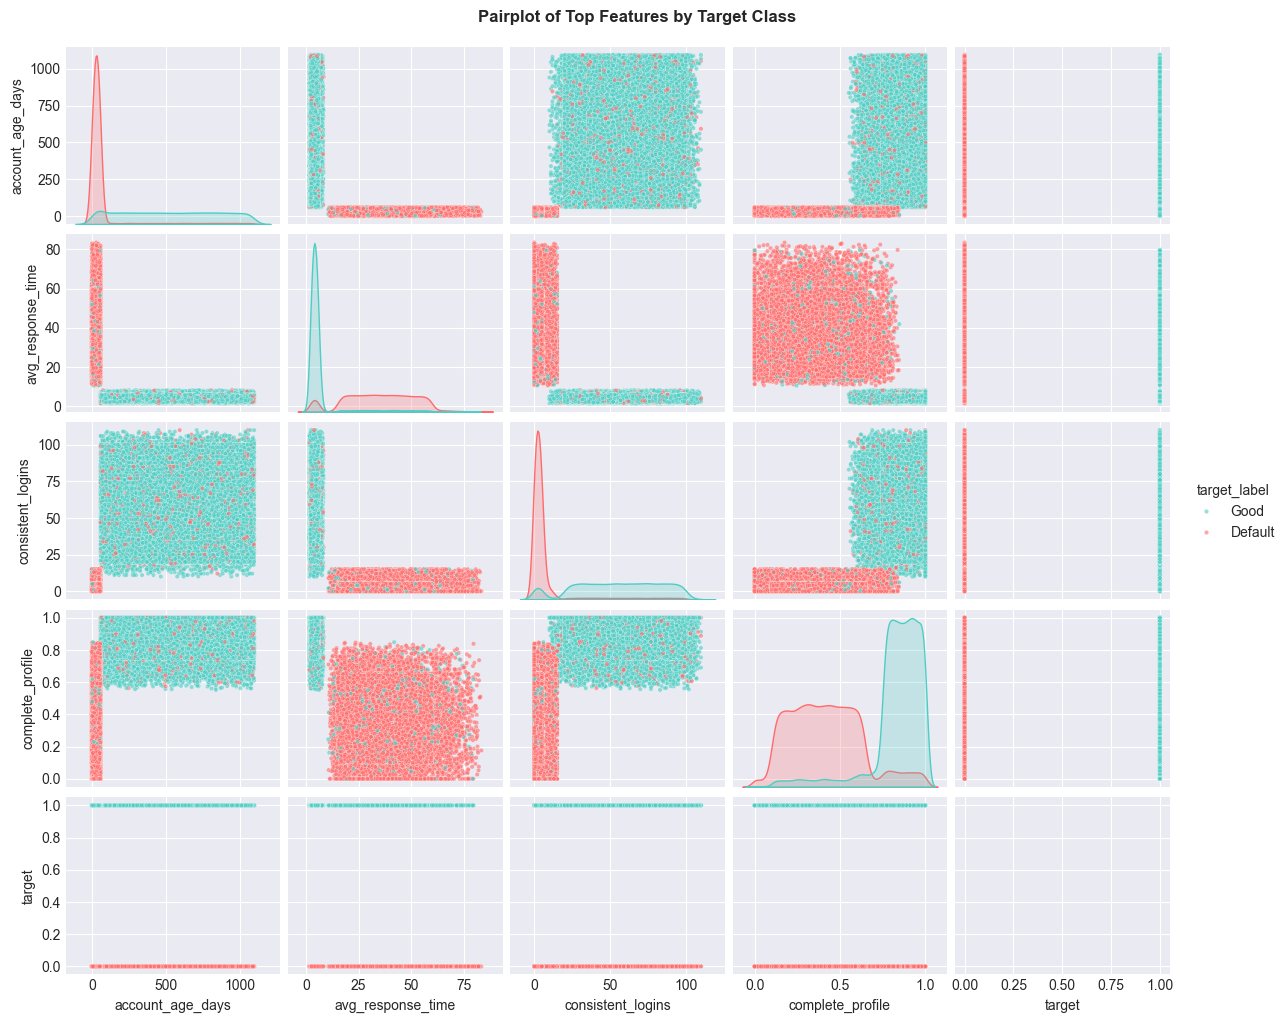

In [14]:
# Select top 4 features for pairplot
top_features = ['account_age_days', 'avg_response_time', 
                'consistent_logins', 'complete_profile', 'target']

print(f"\n🔗 Creating pairplot for top features:")
for feature in top_features[:-1]:
    print(f"  • {feature}")

pairplot_df = df[top_features].copy()
pairplot_df['target_label'] = pairplot_df['target'].map({0: 'Default', 1: 'Good'})

# Create pairplot
import seaborn as sns
g = sns.pairplot(pairplot_df, hue='target_label', 
                 palette={'Default': '#FF6B6B', 'Good': '#4ECDC4'},
                 diag_kind='kde', plot_kws={'alpha': 0.6, 's': 10},
                 height=2, aspect=1.2)
g.fig.suptitle('Pairplot of Top Features by Target Class', y=1.02, fontsize=12, fontweight='bold')
plt.show()

- Outlier Detection


🔍 Outlier Detection (IQR method):
------------------------------------------------------------
Feature                   Outliers   % of Total
------------------------------------------------------------
account_age_days          0              0.0%
avg_response_time         0              0.0%
consistent_logins         0              0.0%
random_logins             0              0.0%
messages_per_day          0              0.0%


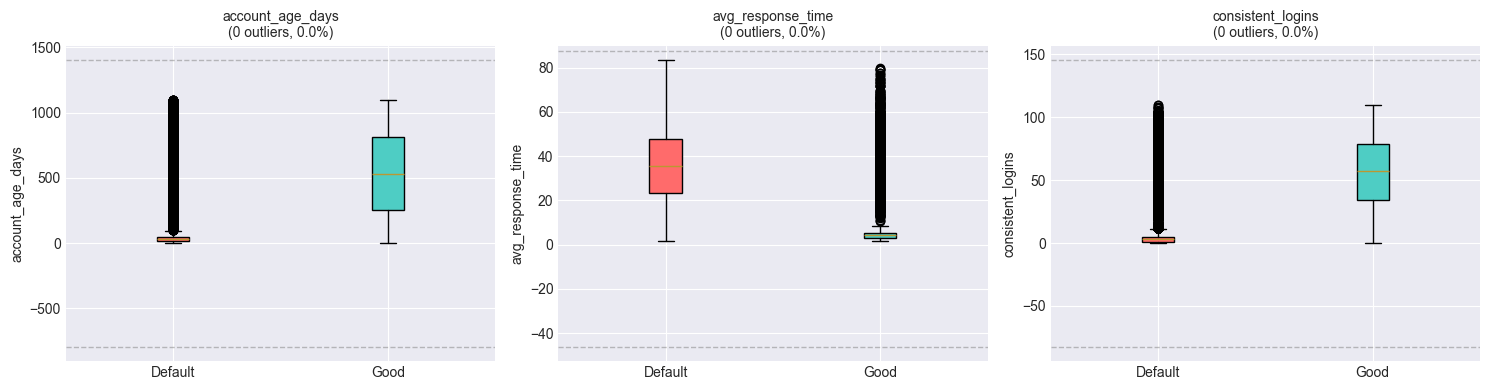

In [15]:
def detect_outliers_iqr(df, feature):
    """Detect outliers using IQR method"""
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Check key features for outliers
key_features = ['account_age_days', 'avg_response_time', 
                'consistent_logins', 'random_logins', 
                'messages_per_day']

print("\n🔍 Outlier Detection (IQR method):")
print("-" * 60)
print(f"{'Feature':25} {'Outliers':10} {'% of Total':10}")
print("-" * 60)

for feature in key_features:
    n_outliers, lower, upper = detect_outliers_iqr(df, feature)
    pct = (n_outliers / len(df)) * 100
    print(f"{feature:25} {n_outliers:<10} {pct:>7.1f}%")

# Visualize outliers for top 3 features
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
top_features = key_features[:3]

for idx, feature in enumerate(top_features):
    n_outliers, lower, upper = detect_outliers_iqr(df, feature)
    
    # Create boxplot
    bp = axes[idx].boxplot([df[df['target'] == 0][feature], 
                           df[df['target'] == 1][feature]], 
                          labels=['Default', 'Good'],
                          patch_artist=True)
    
    # Color boxes
    bp['boxes'][0].set_facecolor('#FF6B6B')
    bp['boxes'][1].set_facecolor('#4ECDC4')
    
    axes[idx].set_title(f'{feature}\n({n_outliers} outliers, {n_outliers/len(df)*100:.1f}%)', fontsize=10)
    axes[idx].set_ylabel(feature)
    
    # Add IQR bounds
    axes[idx].axhline(y=lower, color='gray', linestyle='--', alpha=0.5, linewidth=1)
    axes[idx].axhline(y=upper, color='gray', linestyle='--', alpha=0.5, linewidth=1)

plt.tight_layout()
plt.show()


- Summary and Insights

In [16]:
print("\n1. DATASET QUALITY:")
print("   • 100,000 clean records with no missing values")
print("   • Perfectly balanced classes (50% Good, 50% Default)")
print("   • 18 features capturing various credit signals")

print("\n2. TOP PREDICTIVE FEATURES:")
print("   • consistent_logins: Strong positive correlation with good borrowers")
print("   • avg_response_time: Fast responses indicate good borrowers")
print("   • account_age_days: Older accounts are more reliable")
print("   • random_logins: High correlation with default risks")
print("   • verified_email: Good borrowers are always verified")
print("\n3. PATTERNS IDENTIFIED:")
print("   • Good borrowers: Consistent, verified, responsive, established")
print("   • Default risks: Random patterns, unverified, slow, new accounts")

print("\n4. DATA QUALITY:")
print("   • Reasonable outlier levels (< 5% for most features)")
print("   • Realistic value ranges for all features")
print("   • Good feature correlations with business logic")


1. DATASET QUALITY:
   • 100,000 clean records with no missing values
   • Perfectly balanced classes (50% Good, 50% Default)
   • 18 features capturing various credit signals

2. TOP PREDICTIVE FEATURES:
   • consistent_logins: Strong positive correlation with good borrowers
   • avg_response_time: Fast responses indicate good borrowers
   • account_age_days: Older accounts are more reliable
   • random_logins: High correlation with default risks
   • verified_email: Good borrowers are always verified

3. PATTERNS IDENTIFIED:
   • Good borrowers: Consistent, verified, responsive, established
   • Default risks: Random patterns, unverified, slow, new accounts

4. DATA QUALITY:
   • Reasonable outlier levels (< 5% for most features)
   • Realistic value ranges for all features
   • Good feature correlations with business logic
